#Goal: 

1.   Predict AAPL next day close price.
2.   Use this to make a Buy or Sell Trading Decision. If Next Day Open < Predicted Price. Buy AAPL otherwise Sell.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 100

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/asreddyIITB/ml/main/Predict_StockPrice_Kats/data/AAPL.csv',
                 parse_dates=["Date"], 
                 index_col=["Date"])

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-03-22,26.312500,26.822500,26.302500,26.680000,24.668690,129777600
2016-03-23,26.620001,26.767500,26.475000,26.532499,24.532307,102814000
2016-03-24,26.367500,26.562500,26.222500,26.417500,24.425974,104532000
2016-03-28,26.500000,26.547501,26.264999,26.297501,24.315018,77645600
2016-03-29,26.222500,26.947500,26.219999,26.920000,24.890591,124760400


In [4]:
df = df.asfreq('B')

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-03-22,26.312500,26.822500,26.302500,26.680000,24.668690,129777600.0
2016-03-23,26.620001,26.767500,26.475000,26.532499,24.532307,102814000.0
2016-03-24,26.367500,26.562500,26.222500,26.417500,24.425974,104532000.0
2016-03-25,NaN,NaN,NaN,NaN,NaN,NaN
2016-03-28,26.500000,26.547501,26.264999,26.297501,24.315018,77645600.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1565 entries, 2016-03-22 to 2022-03-21
Freq: B
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1511 non-null   float64
 1   High       1511 non-null   float64
 2   Low        1511 non-null   float64
 3   Close      1511 non-null   float64
 4   Adj Close  1511 non-null   float64
 5   Volume     1511 non-null   float64
dtypes: float64(6)
memory usage: 85.6 KB


In [7]:
df.fillna(method='ffill', inplace=True)

In [8]:
df['returns'] = df['Close'].pct_change(1)

In [9]:
df['returns'].fillna(0.0, inplace=True)

In [11]:
df.shape

(1565, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1565 entries, 2016-03-22 to 2022-03-21
Freq: B
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1565 non-null   float64
 1   High       1565 non-null   float64
 2   Low        1565 non-null   float64
 3   Close      1565 non-null   float64
 4   Adj Close  1565 non-null   float64
 5   Volume     1565 non-null   float64
 6   returns    1565 non-null   float64
dtypes: float64(7)
memory usage: 97.8 KB


## Base Model: Using Kats library lets try to predict future return based on data from last N days. 
>To start with I will use N = 5 (I will call this LOOK_BACK_WINDOW)

In [12]:
LOOK_BACK_WINDOW = 5

for i in range(LOOK_BACK_WINDOW): 
  df[f"returns_{i+1}"] = df["returns"].shift(periods=i+1)

In [13]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,returns,returns_1,returns_2,returns_3,returns_4,returns_5
Date,,,,,,,,,,,,
2016-03-22,26.312500,26.822500,26.302500,26.680000,24.668690,129777600.0,0.000000,NaN,NaN,NaN,NaN,NaN
2016-03-23,26.620001,26.767500,26.475000,26.532499,24.532307,102814000.0,-0.005529,0.000000,NaN,NaN,NaN,NaN
2016-03-24,26.367500,26.562500,26.222500,26.417500,24.425974,104532000.0,-0.004334,-0.005529,0.000000,NaN,NaN,NaN
2016-03-25,26.367500,26.562500,26.222500,26.417500,24.425974,104532000.0,0.000000,-0.004334,-0.005529,0.000000,NaN,NaN
2016-03-28,26.500000,26.547501,26.264999,26.297501,24.315018,77645600.0,-0.004542,0.000000,-0.004334,-0.005529,0.000000,NaN
2016-03-29,26.222500,26.947500,26.219999,26.920000,24.890591,124760400.0,0.023671,-0.004542,0.000000,-0.004334,-0.005529,0.000000
2016-03-30,27.162500,27.605000,27.150000,27.389999,25.325161,182404400.0,0.017459,0.023671,-0.004542,0.000000,-0.004334,-0.005529
2016-03-31,27.430000,27.475000,27.219999,27.247499,25.193399,103553600.0,-0.005203,0.017459,0.023671,-0.004542,0.000000,-0.004334
2016-04-01,27.195000,27.500000,27.049999,27.497499,25.424551,103496000.0,0.009175,-0.005203,0.017459,0.023671,-0.004542,0.000000


In [14]:
df.fillna(0.0, inplace=True)

In [15]:
## install kats library. https://github.com/facebookresearch/Kats

!pip install kats --quiet

     |████████████████████████████████| 612 kB 5.2 MB/s 
     |████████████████████████████████| 3.3 MB 41.5 MB/s 
     |████████████████████████████████| 9.5 MB 25.1 MB/s 
     |████████████████████████████████| 950 kB 55.7 MB/s 
     |████████████████████████████████| 310 kB 71.4 MB/s 
     |████████████████████████████████| 347 kB 57.8 MB/s 
     |████████████████████████████████| 34.5 MB 15 kB/s 


In [16]:
from kats.consts import TimeSeriesData

# Creating a Dataset object with Kats 
ts_data = TimeSeriesData(time = df.index , 
               value = df.returns, sort_by_time= True)

type(ts_data)

kats.consts.TimeSeriesData

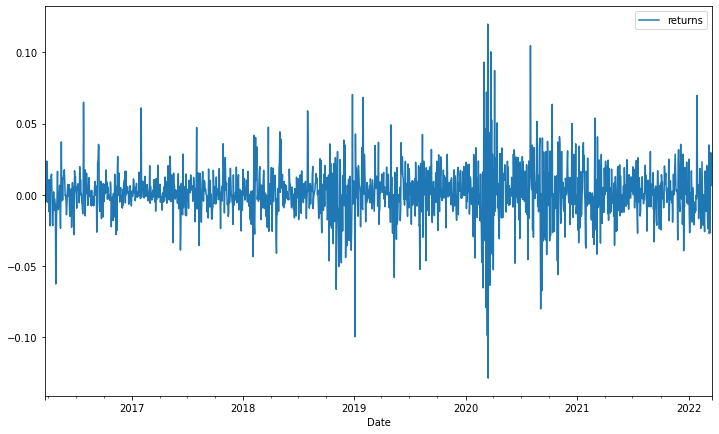

In [17]:
# Plotting the timeseries data 
import matplotlib.pyplot as plt

ts_data.plot(cols=['returns'])
plt.show()

In [47]:
#Importing the prophet 
from kats.models.prophet import ProphetModel , ProphetParams

# Creating a model param instance 
params = ProphetParams(seasonality_mode= 'additive') 

# Create a prophet model instance
model = ProphetModel(ts_data , params)

model.fit() 

forecast = model.predict(steps= 1 , include_history= True , freq = '1W')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


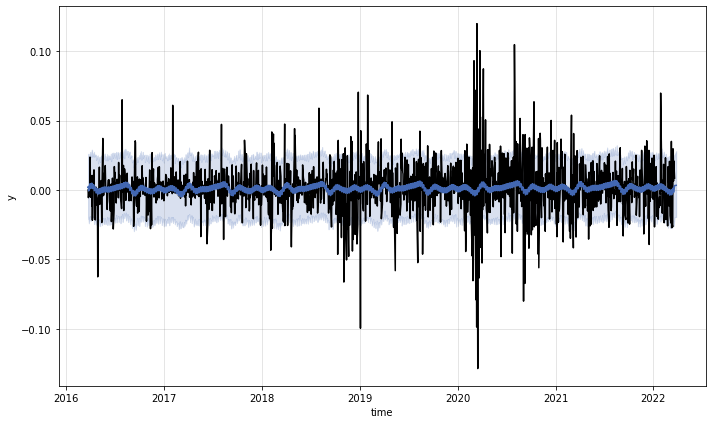

In [44]:
model.plot()

In [48]:
forecast.head(10)


,time,fcst,fcst_lower,fcst_upper
0,2016-03-22,0.001917,-0.021425,0.025670
1,2016-03-23,0.002560,-0.020823,0.025820
2,2016-03-24,-0.000667,-0.023906,0.021480
3,2016-03-25,-0.000100,-0.024135,0.022083
4,2016-03-28,0.004004,-0.018935,0.027916
5,2016-03-29,0.003966,-0.018842,0.028426
6,2016-03-30,0.004445,-0.019007,0.028225
7,2016-03-31,0.001029,-0.022779,0.024916
8,2016-04-01,0.001386,-0.021736,0.025934
9,2016-04-04,0.004766,-0.018287,0.028963


In [53]:
forecast.set_index('time', inplace=True)

In [54]:
forecast.head()

,fcst,fcst_lower,fcst_upper
time,,,
2016-03-22,0.001917,-0.021425,0.025670
2016-03-23,0.002560,-0.020823,0.025820
2016-03-24,-0.000667,-0.023906,0.021480
2016-03-25,-0.000100,-0.024135,0.022083
2016-03-28,0.004004,-0.018935,0.027916


In [52]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,returns,returns_1,returns_2,returns_3,returns_4,returns_5
Date,,,,,,,,,,,,
2016-03-22,26.312500,26.822500,26.302500,26.680000,24.668690,129777600.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2016-03-23,26.620001,26.767500,26.475000,26.532499,24.532307,102814000.0,-0.005529,0.000000,0.000000,0.000000,0.0,0.0
2016-03-24,26.367500,26.562500,26.222500,26.417500,24.425974,104532000.0,-0.004334,-0.005529,0.000000,0.000000,0.0,0.0
2016-03-25,26.367500,26.562500,26.222500,26.417500,24.425974,104532000.0,0.000000,-0.004334,-0.005529,0.000000,0.0,0.0
2016-03-28,26.500000,26.547501,26.264999,26.297501,24.315018,77645600.0,-0.004542,0.000000,-0.004334,-0.005529,0.0,0.0


### Compute Insample Profit 💰💰💰💰

In [55]:
result = pd.concat([df, forecast], axis=1, join="inner")

In [58]:
result['fcst_close'] = result['fcst'] * result['Close'] + result['Close']
result['fcst_close_low'] = result['fcst_lower'] * result['Close'] + result['Close']
result['fcst_close_upper'] = result['fcst_upper'] * result['Close'] + result['Close']


In [ ]:
result['fcst_close'] = result['fcst_close'].shift(periods=1)
result['fcst_close_low'] = result['fcst_close_low'].shift(periods=1)
result['fcst_close_upper'] = result['fcst_close_upper'].shift(periods=1)

In [71]:
result['profit'] = 0
result['profit'] = 100.0 * np.where(result['Open'] < result['fcst_close_low'], result['Close']- result['Open'],
                            np.where(result['Open'] > result['fcst_close_upper'], result['Open'] - result['Close'], 0.0))

result['rate_of_return'] = 0
result['rate_of_return'] = np.where(result['Open'] < result['fcst_close_low'], (result['Close']- result['Open']) / result['Open'],
                            np.where(result['Open'] > result['fcst_close_upper'], (result['Open'] - result['Close']) / result['Open'], 0.0))

In [72]:
result['cum_return'] = (1.0 + result['rate_of_return']).cumprod()

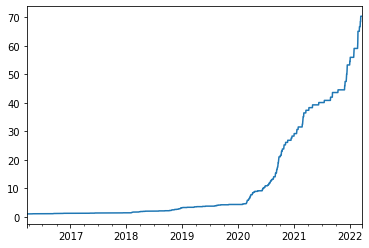

In [73]:
result['cum_return'].plot()

In [74]:
result['cum_profit'] = result['profit'].cumsum()

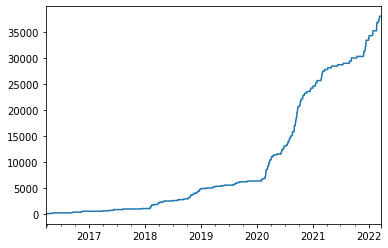

In [75]:
result['cum_profit'].plot()

In [69]:
result['profit'].describe()

count    1565.000000
mean       24.311497
std        91.759365
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1016.000300
Name: profit, dtype: float64

In [70]:
result[result['profit'] != 0]['profit'].describe()

count     137.000000
mean      277.718923
std       161.040286
min        59.500100
25%       139.500000
50%       263.000100
75%       386.999500
max      1016.000300
Name: profit, dtype: float64

In [77]:
print(f"Cummulative profit over 5 years with intraday trading no overnight position (trading 100 lots): {result['cum_profit'].iloc[-1]}")

Cummulative profit over 5 years with intraday trading no overnight position (trading 100 lots): 38047.4925


In [76]:
print(f"Cummulative return over 5 years with intraday trading no overnight position: {result['cum_return'].iloc[-1]}")

Cummulative return over 5 years with intraday trading no overnight position: 70.32139609296915


##**Summary**



1.   Our strategy trades on 137 days out of 1565 in our in-sample data
2.   Strategy has no negative days.
3.   Trading 100 lots has a cummulative profit of $38047. This corresponds to a cummulative return of 7032%. Note that this is with no overnight position and intraday trading. (ie relatively low risk strategy)


### Intentionally ignored out of sample evaluation, feature engineering, improvements to not disclose proprietary information